In [97]:
# Use k=3

# The raw data are the temperature readings every ten (10) minutes for one (1) year

# Preprocess to fill in missing values - linear interpolation is fine
# Average the temperature for each day from 11:00 AM to 3:00 PM
# This will result in 365 floating-point values
# Initialize the centers - in this case the initialization choice has a noticeable impact

# Iterate to convergence

# How many steps did it take to converge?

# What are the three centers it found?

# Report the temperature values
# Plot the daytime average for each day - color the scatterplot to indicate the three clusters
# Put everything into a single PDF and upload that PDF

data = []
averages = [100000 for i in range(365)]
with open('t365.txt') as f:
    for line in f:
        if len(line.strip()) != 2:
            data.append(-1)
        else:
            data.append(int(line.strip()))
tempAverage = 0
for i,j in enumerate(data):
    if j==-1:
        data[i] = (data[i+1]+data[i-1])/2
for i in range(365):
    for j in range(66,91):
        tempAverage+=data[144*i+j]
    averages[i] = tempAverage/24
    tempAverage=0

In [98]:
import math

import numpy as np
import csv
X = [i for i in range(365)]
Y = averages

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


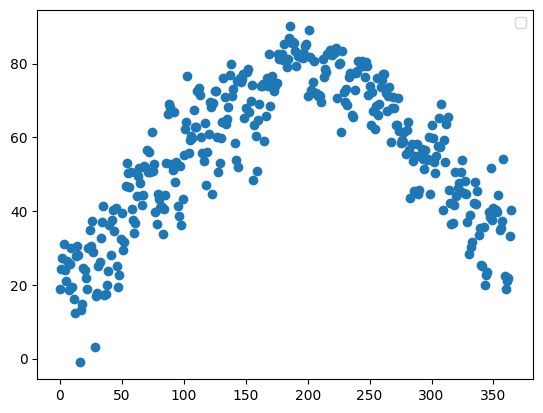

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(X,Y, color='C0')
ax.legend()
ax.axis('auto')
plt.show()

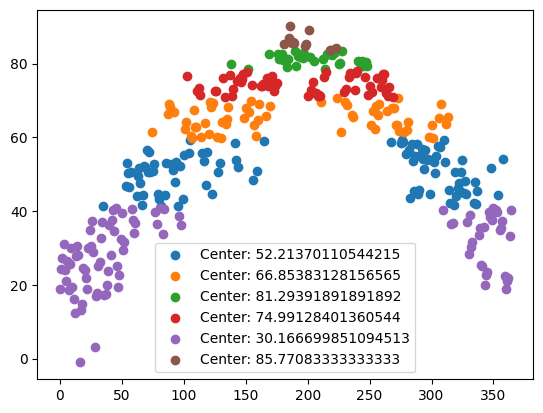

6
[52.21370110544215, 66.85383128156565, 81.29391891891892, 74.99128401360544, 30.166699851094513, 85.77083333333333]


In [113]:
import random

k=6
centerLocX = [[] for i in range(k)]
centerLocY = [[random.randint(10, 90)] for i in range(k)]
prevYCenters = [0 for i in range(k)]
yCenters = [random.randint(10, 90) for i in range(k)]
count = 1
while(sum([abs(yCenters[l] - prevYCenters[l]) for l in range(k)]) > 5):
    count+=1
    for i in range(k):
        prevYCenters[i] = yCenters[i]
        yCenters[i] = sum(centerLocY[i])/len(centerLocY[i])
        centerLocX[i].clear()
        centerLocY[i].clear()
    for i in range(len(X)):
        distances = [pow(Y[i]-yCenters[j],2) for j in range(k)]
        place = distances.index(min(distances))
        centerLocX[place].append(X[i])
        centerLocY[place].append(Y[i])
        
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i in range(k):
    plt.scatter(centerLocX[i],centerLocY[i], color='C'+str(i), label='Center: ' + str(yCenters[i]))
ax.legend()
ax.axis('auto')
plt.show()
print(count)
print(yCenters)